In [13]:
import os,sys
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statannot import add_stat_annotation

%matplotlib inline 
sns.set_style('darkgrid')

In [14]:
data_file = '/home/jlk/Project/111_Cmap/MOA/analysis/plot_acc/experiment_result_dropout.xlsx'
df = pd.read_excel(data_file,sheet_name='high_tas',index_col=0)
df['MOASL'] = df['MOAEMB']

embedding_df = pd.read_csv('/home/jlk/Project/111_Cmap/MOA/analysis/plot_acc/embedding_size_tas_layer4.csv')
few_df = pd.read_csv('/home/jlk/Project/111_Cmap/MOA/analysis/plot_acc/data_size_tas_dropout.csv')

margin_list = [0.0001,0.001,0.01,0.05,0.1]
# margin_list = [0.0001,0.001,0.01,0.1]

data_dir = '/home/jlk/Project/111_Cmap/MOA/src/result_margin_tas_dropout'
margin_df = pd.DataFrame()
for m in margin_list:
    file = '{}/all_fold_{}_0_layer4_600.csv'.format(data_dir,m)
    df1 = pd.read_csv(file)
    df1['acc'] = df1['find']/df1['sample_num']
    df1['margin'] = m
    margin_df = pd.concat([margin_df,df1])
    
    
print(df)
print(embedding_df)
print(margin_df)

     Fold  Train_sig  Test_sig  Train_drug  Test_drug  MOAEMB  DrSim  SigMat  \
ALL     0      28804     12205         401        192    6887   6060    6126   
ALL     1      27989     13020         391        202    6997   5808    6299   
ALL     2      25225     15784         394        199    9030   8214    8652   

       RF  GSEA  ssCmap  Xcosine  Xsum  L1000CDS  Euclidean  Jaccard  Random  \
ALL  5947  5121    4790     4835  3280      4777       4742     5051     440   
ALL  5509  4836    4722     5157  3992      5074       4940     5509     527   
ALL  7963  7264    7112     7161  5927      7092       7027     7614     672   

     MOASL  
ALL   6887  
ALL   6997  
ALL   9030  
    Unnamed: 0  fold  embedding  find  original       per
0            0     0         16  6479     12205  0.530848
1            1     0         32  6821     12205  0.558869
2            2     0         64  6884     12205  0.564031
3            3     0        128  6913     12205  0.566407
4            4  

In [21]:
### all fold
methods = ['MOASL','DrSim','SigMat','RF',
           'GSEA','ssCmap','Xcosine','Xsum',
           'Euclidean','L1000CDS','Jaccard','Random']
# methods_belong = {'MOASL':'MOASL','DrSim':'Machine learning','SigMat':'Machine learning','RF':'Machine learning',
#            'GSEA':'Biology','ssCmap':'Biology','Xcosine':'Biology','Xsum':'Biology',
#            'Euclidean':'Distance','L1000CDS':'Distance','Jaccard':'Distance','Random':'Random'}

methods_belong = {'MOASL':'MOASL',
                  'DrSim':'Machine learning based','SigMat':'Machine learning based','RF':'Machine learning based',
                  'GSEA':'Statistics-based','ssCmap':'Statistics-based',
                  'Xcosine':'Statistics-based','Xsum':'Statistics-based',
                  'Euclidean':'Distance-based','L1000CDS':'Distance-based',
                  'Jaccard':'Distance-based','Random':'Random'}

cols = []
cols_kind = ['MOASL','Machine learning based','Statistics-based','Distance-based','Random']
col_pal = sns.color_palette("colorblind")
for method in methods:
    for i in range(len(cols_kind)):
        color = col_pal[i]
        kind = cols_kind[i]
        if methods_belong[method] == kind:
            cols.append(color)
print(df)
df = df.loc[['ALL']]

acc_sig = []
acc_val = []
tests = []
labels = []
folds = []
kinds = []
for method in methods:
    for fold in [0,1,2]:
        acc = df[df['Fold']==fold][method].values[0]
        acc_sig.append(acc)
        Test = df[df['Fold']==fold]['Test_sig'].values[0]
        tests.append(Test)
        acc_val.append(acc/Test)
        labels.append(method)
        folds.append(fold)
        kinds.append(methods_belong[method])
plot_df = pd.DataFrame()
plot_df['test'] = tests
plot_df['method'] = labels
plot_df['fold'] = folds
plot_df['correct signatures'] = acc_sig
plot_df['accuracy'] = acc_val
plot_df['kind'] = kinds
print(plot_df)

     Fold  Train_sig  Test_sig  Train_drug  Test_drug  MOAEMB  DrSim  SigMat  \
ALL     0      28804     12205         401        192    6887   6060    6126   
ALL     1      27989     13020         391        202    6997   5808    6299   
ALL     2      25225     15784         394        199    9030   8214    8652   

       RF  GSEA  ssCmap  Xcosine  Xsum  L1000CDS  Euclidean  Jaccard  Random  \
ALL  5947  5121    4790     4835  3280      4777       4742     5051     440   
ALL  5509  4836    4722     5157  3992      5074       4940     5509     527   
ALL  7963  7264    7112     7161  5927      7092       7027     7614     672   

     MOASL  
ALL   6887  
ALL   6997  
ALL   9030  
     test     method  fold  correct signatures  accuracy  \
0   12205      MOASL     0                6887  0.564277   
1   13020      MOASL     1                6997  0.537404   
2   15784      MOASL     2                9030  0.572098   
3   12205      DrSim     0                6060  0.496518   
4   13

In [24]:
from scipy import stats
# cols_kind = ['MOASL','Machine learning based','Statistics-based','Distance-based','Random']

moasl = plot_df[plot_df['method']=='MOASL']['accuracy']
ml = plot_df[plot_df['kind']=='Machine learning based']['accuracy']
bio = plot_df[plot_df['kind']=='Statistics-based']['accuracy']
dis = plot_df[plot_df['kind']=='Distance-based']['accuracy']

def t_test(x1,x2):
    t,p = stats.ttest_ind(x1,x2)
    if p < 0.05 and p >0.01:
        label = '*'
    elif p < 0.01 and p > 0.001:
        label = '**'
    elif p < 0.001 and p > 0.0001:
        label = '***'
    elif p < 0.0001:
        label = '****'
    else:
        label = 'ns'
    print(p,label,np.mean(x1),np.mean(x2))
    return label,p

one,one_p = t_test(moasl,ml)
two,two_p = t_test(moasl,bio)
three,three_p = t_test(moasl,dis)
four,four_p = t_test(ml,bio)
five,five_p = t_test(ml,dis)
six,six_p = t_test(bio,dis)


0.01437775406204337 * 0.5579264189859588 0.49019406994247183
0.0002759071602095711 *** 0.5579264189859588 0.38780959164846257
6.965100203416906e-05 **** 0.5579264189859588 0.4181018229180671
0.00018025705199142624 *** 0.49019406994247183 0.38780959164846257
0.0006385114671562088 *** 0.49019406994247183 0.4181018229180671
0.18006965385755652 ns 0.38780959164846257 0.4181018229180671


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MOASL v.s. SigMat: t-test independent samples, P_val=9.972e-02 stat=2.134e+00
SigMat v.s. ssCmap: t-test independent samples, P_val=2.721e-02 stat=3.403e+00
MOASL v.s. ssCmap: t-test independent samples, P_val=4.998e-03 stat=5.598e+00
ssCmap v.s. Jaccard: t-test independent samples, P_val=3.223e-01 stat=-1.128e+00
SigMat v.s. Jaccard: t-test independent samples, P_val=6.784e-02 stat=2.485e+00
MOASL v.s. Jaccard: t-test independent samples, P_val=7.801e-03 stat=4.943e+00


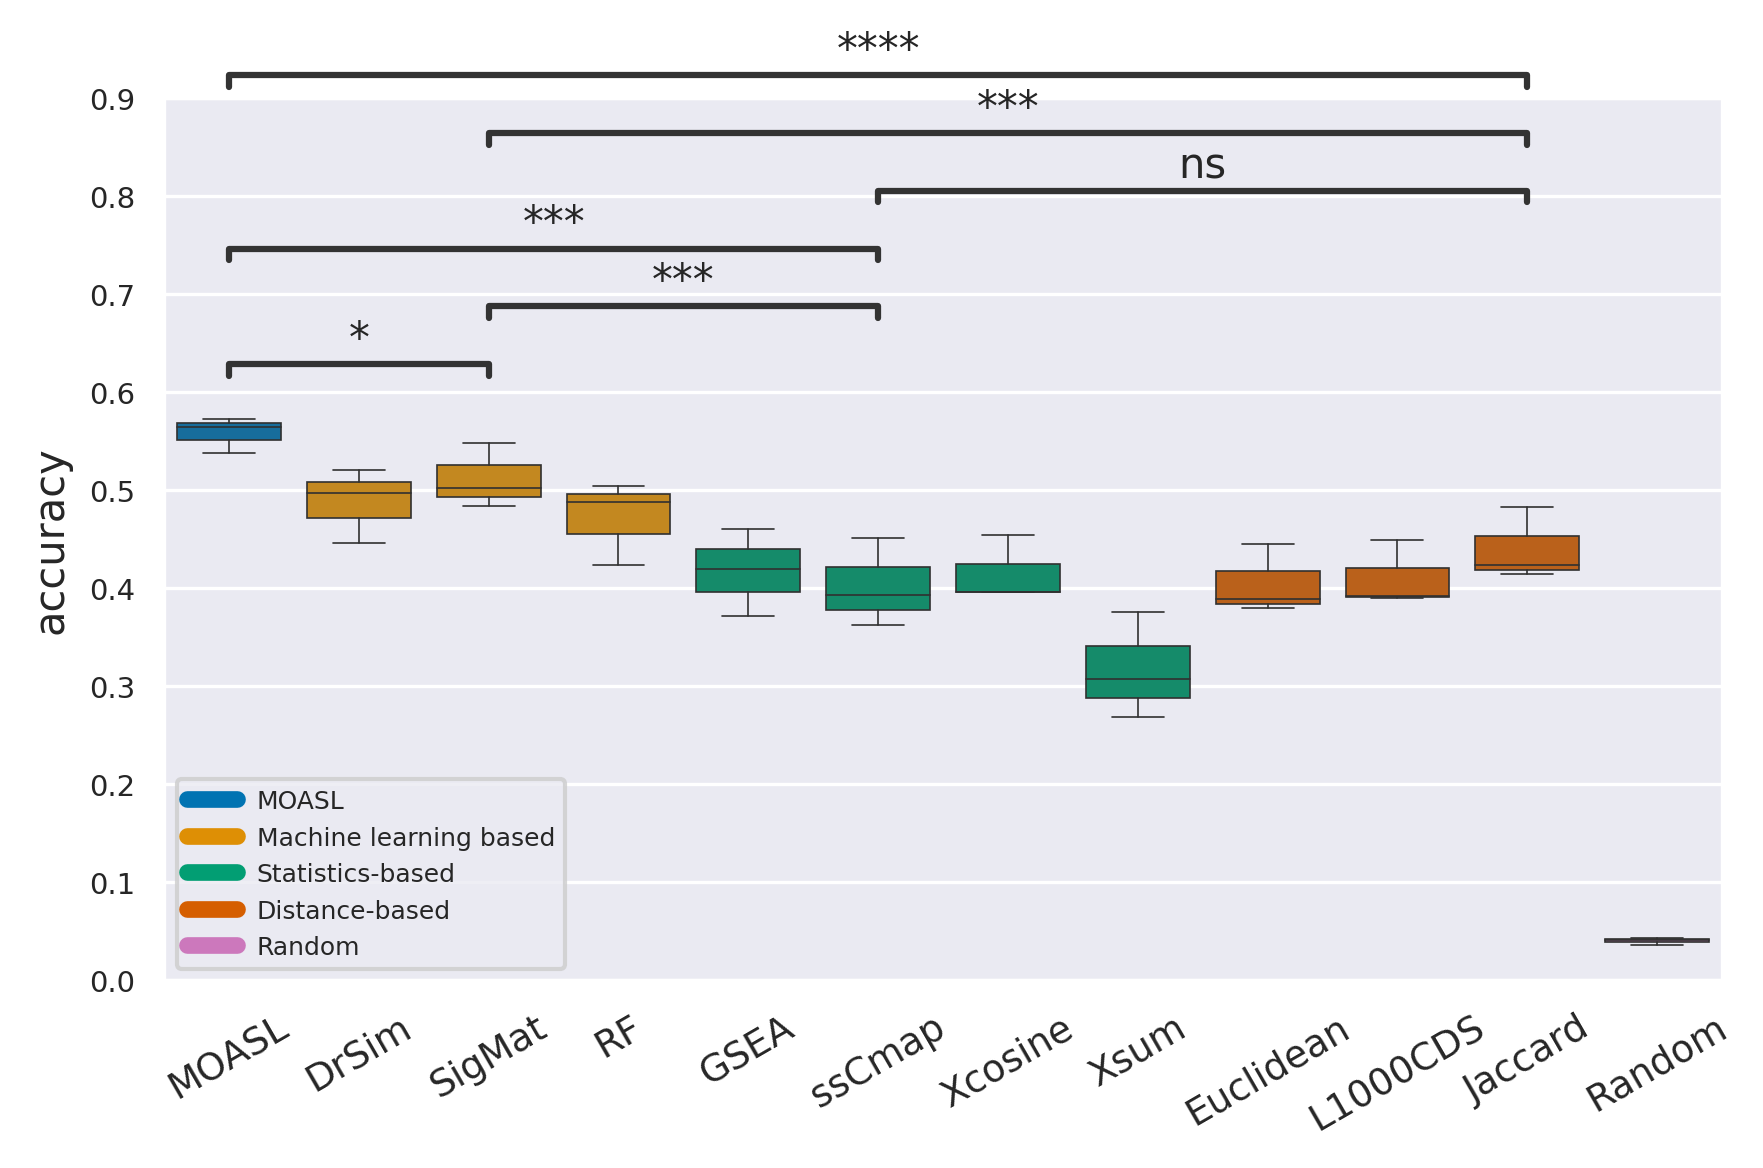

In [25]:
my_dpi=300
plt.figure(figsize=(6,4),dpi=my_dpi)
##################
# accuracy
ax1 = plt.subplot(1,1,1)
sns.boxplot(x='method',y='accuracy',data=plot_df,palette=cols,linewidth=0.4).set(xlabel=None)
test_results = add_stat_annotation(ax1, data=plot_df, x='method',y='accuracy', order=methods,
                                   box_pairs=[("MOASL", "SigMat"),
                                              ("MOASL","ssCmap"),
                                              ("MOASL","Jaccard"),
                                              ("SigMat",'ssCmap'),
                                              ('SigMat','Jaccard'),
                                              ('ssCmap','Jaccard')
                                             ],
                                   text_annot_custom=[one, two, three,four,five,six],
                                   test='t-test_ind', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=2)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9],fontsize=7)
custom_lines = [Line2D([0], [0], color=col_pal[0], lw=4),
                Line2D([0], [0], color=col_pal[1], lw=4),
                Line2D([0], [0], color=col_pal[2], lw=4),
                Line2D([0], [0], color=col_pal[3], lw=4),
                Line2D([0], [0], color=col_pal[4], lw=4)]
ax1.legend(custom_lines, cols_kind,bbox_to_anchor=(0, 0.12), loc='center left',fontsize=6)
# plt.title('A',loc='left')
plt.yticks(fontsize=7)
plt.xticks(rotation=30,fontsize=9)
plt.tight_layout()
plt.show()
# plt.savefig('Figure3_2.jpg')

/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  


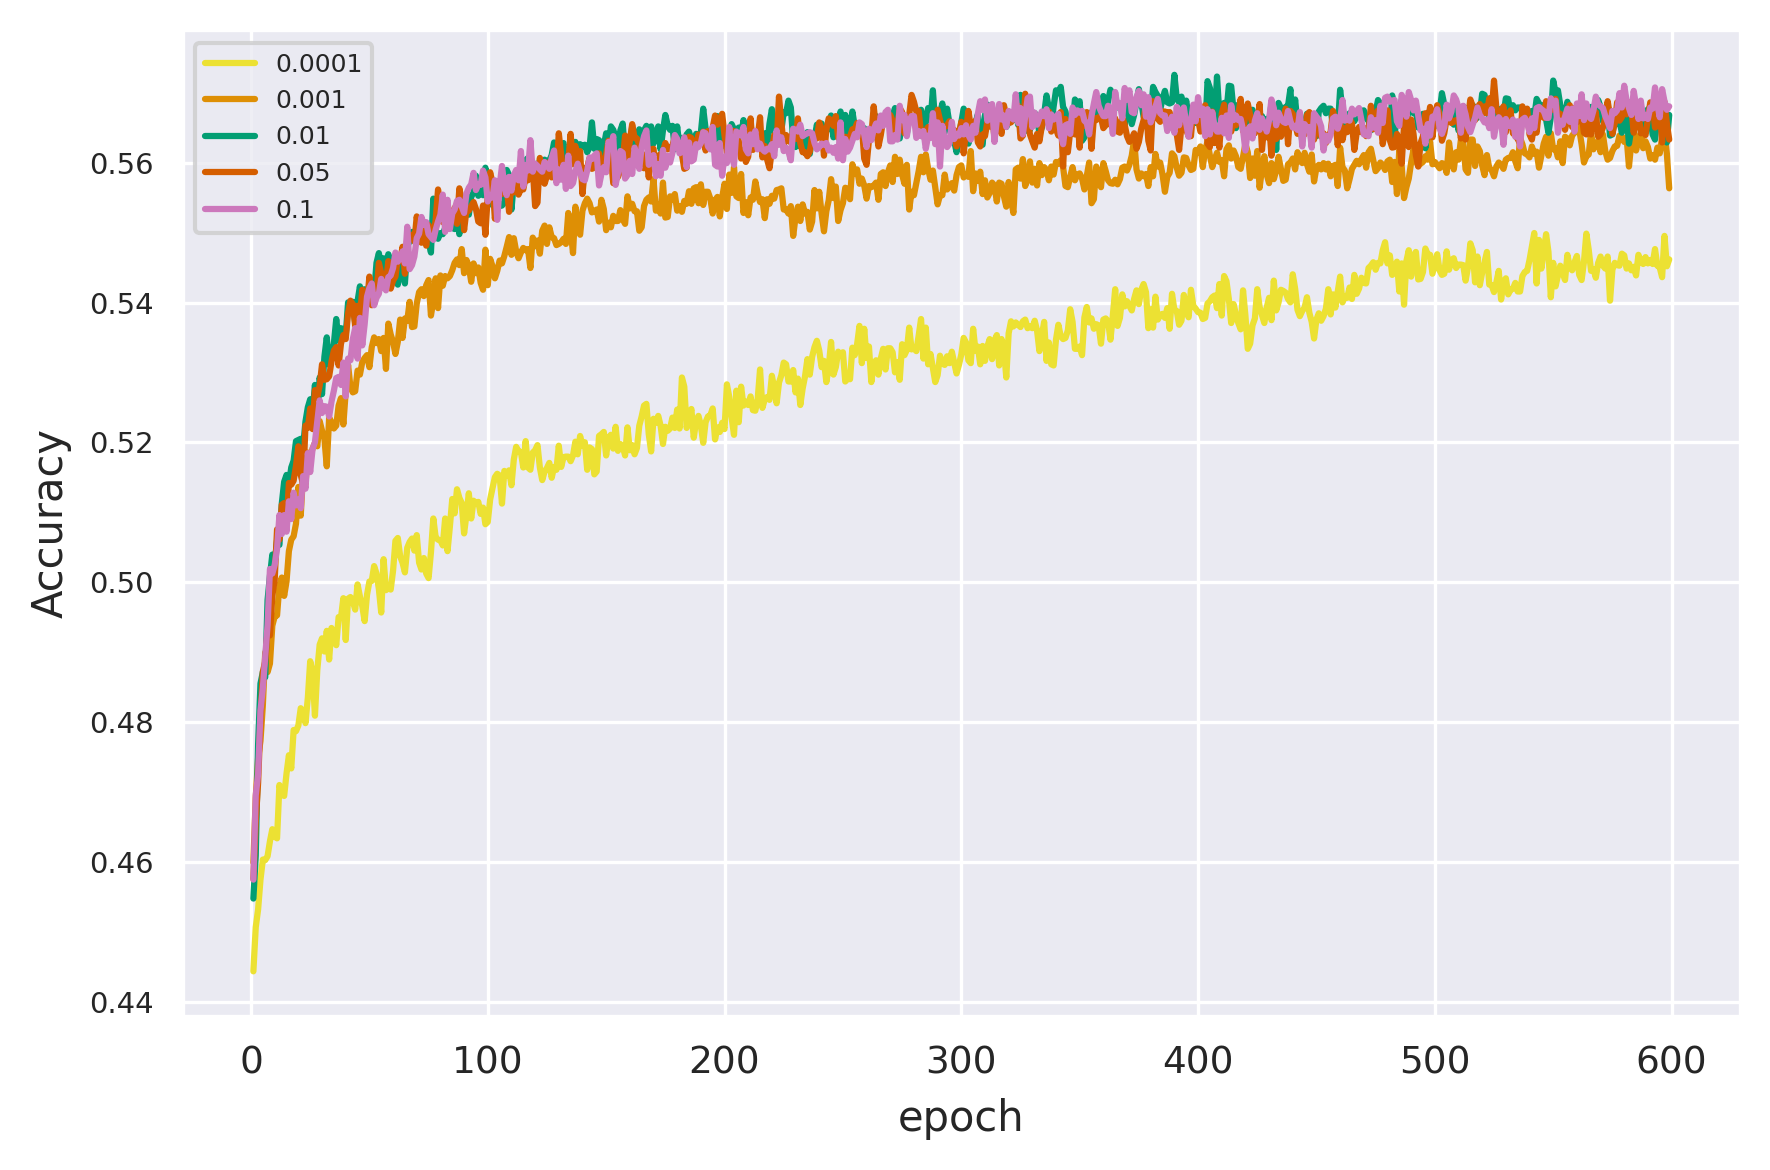

In [26]:
my_dpi=300
plt.figure(figsize=(6,4),dpi=my_dpi)
##################
# margin
ax1 = plt.subplot(1,1,1)
pal = sns.color_palette("colorblind")
pal[0] = pal[8]
sns.lineplot(x='epoch',y='acc',data=margin_df,hue='margin',palette=pal,ax=ax1).set(
    ylabel='')
ax1.legend(loc='best',fontsize=6)
# plt.title('B',loc='left')
# plt.text(440, 0.362, 'margin', fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=9)
plt.ylabel('Accuracy')
plt.tight_layout()
plt.tight_layout()
# plt.show()
plt.savefig('Figure3_3.jpg')

/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  import sys


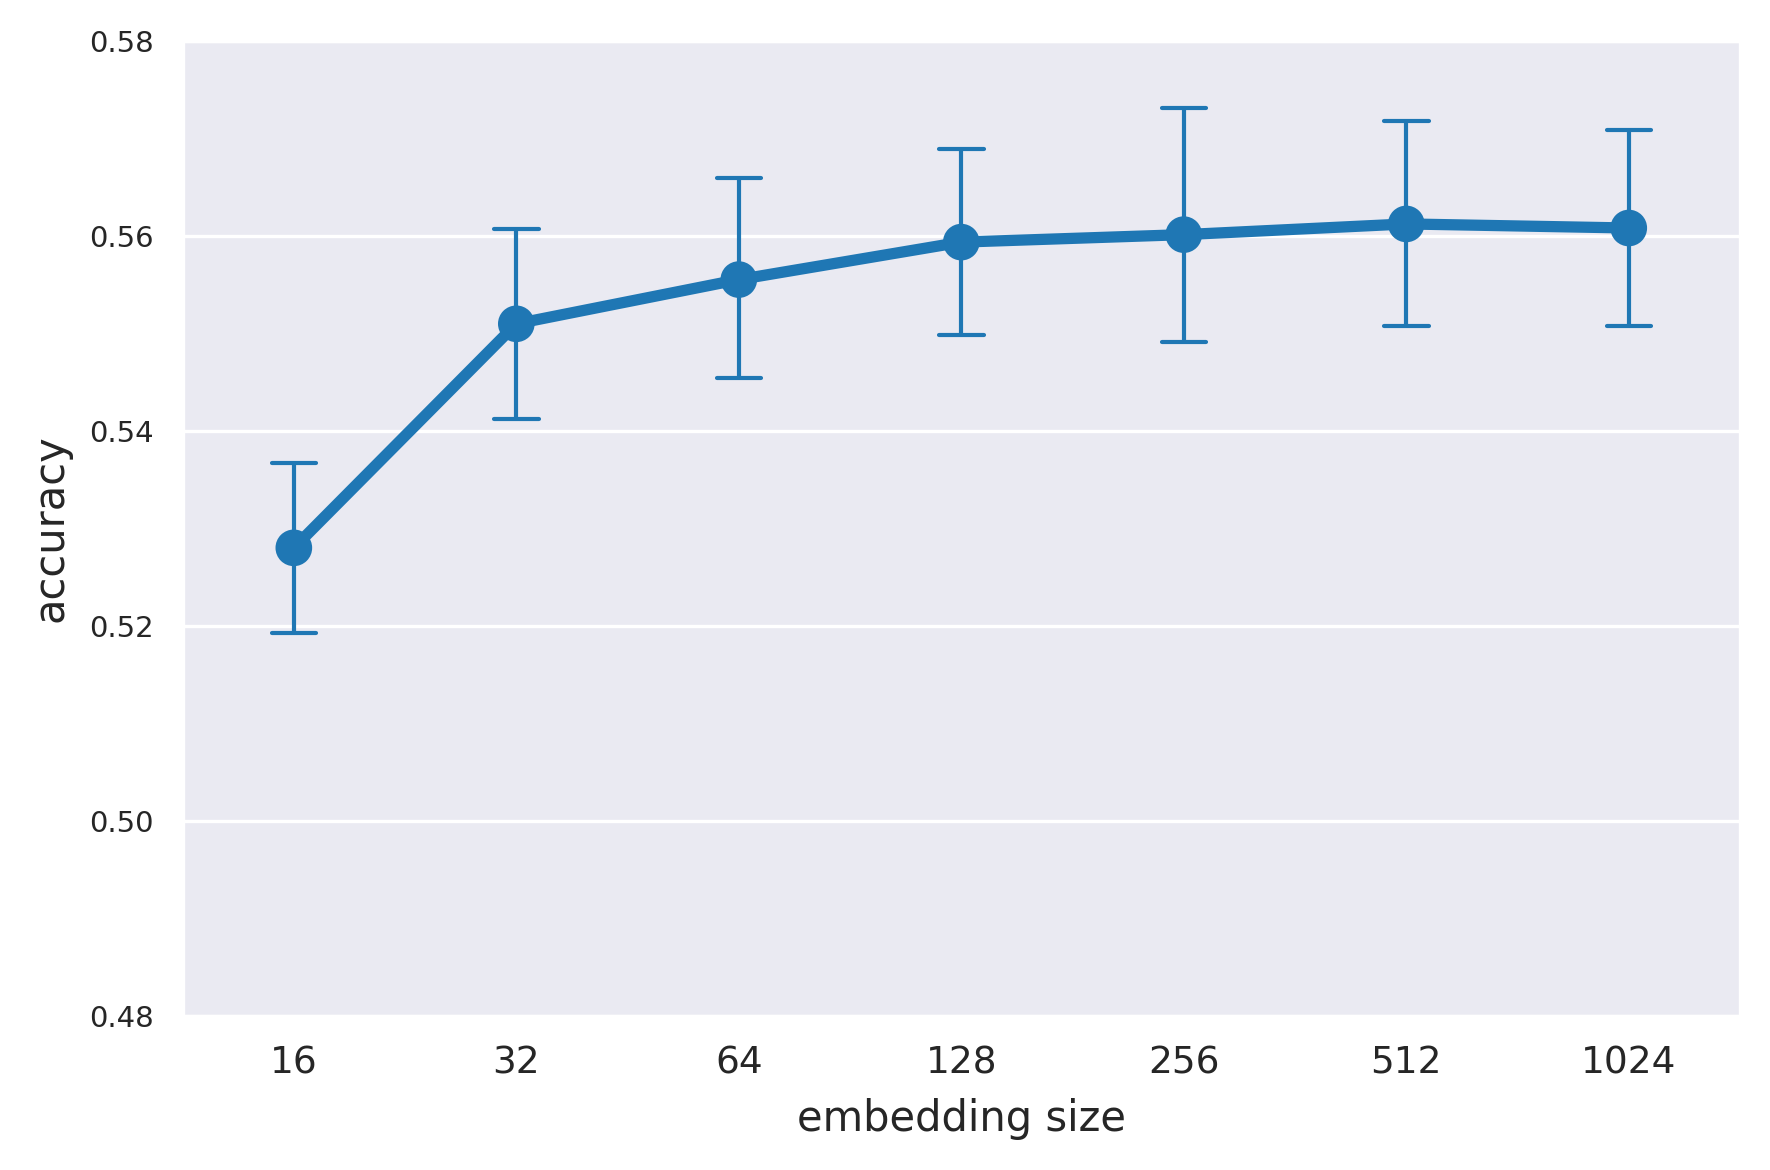

In [27]:
my_dpi=300
plt.figure(figsize=(6,4),dpi=my_dpi)
##################
# embedding size
ax = plt.subplot(1,1,1)
fig = sns.pointplot(x='embedding',y='per',data=embedding_df,ax=ax,errwidth=1,ci=68,
             capsize=0.2).set(
    xlabel='embedding size',ylabel='accuracy')
# plt.title('C',loc='left')
plt.yticks([0.48,0.50,0.52,0.54,0.56,0.58],fontsize=7)
# plt.yticks([0.55,0.555,0.56,0.565,0.57,0.58],fontsize=7)
plt.xticks(fontsize=9)
plt.tight_layout()
# plt.show()
plt.savefig('Figure3_4.jpg')

/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  import sys


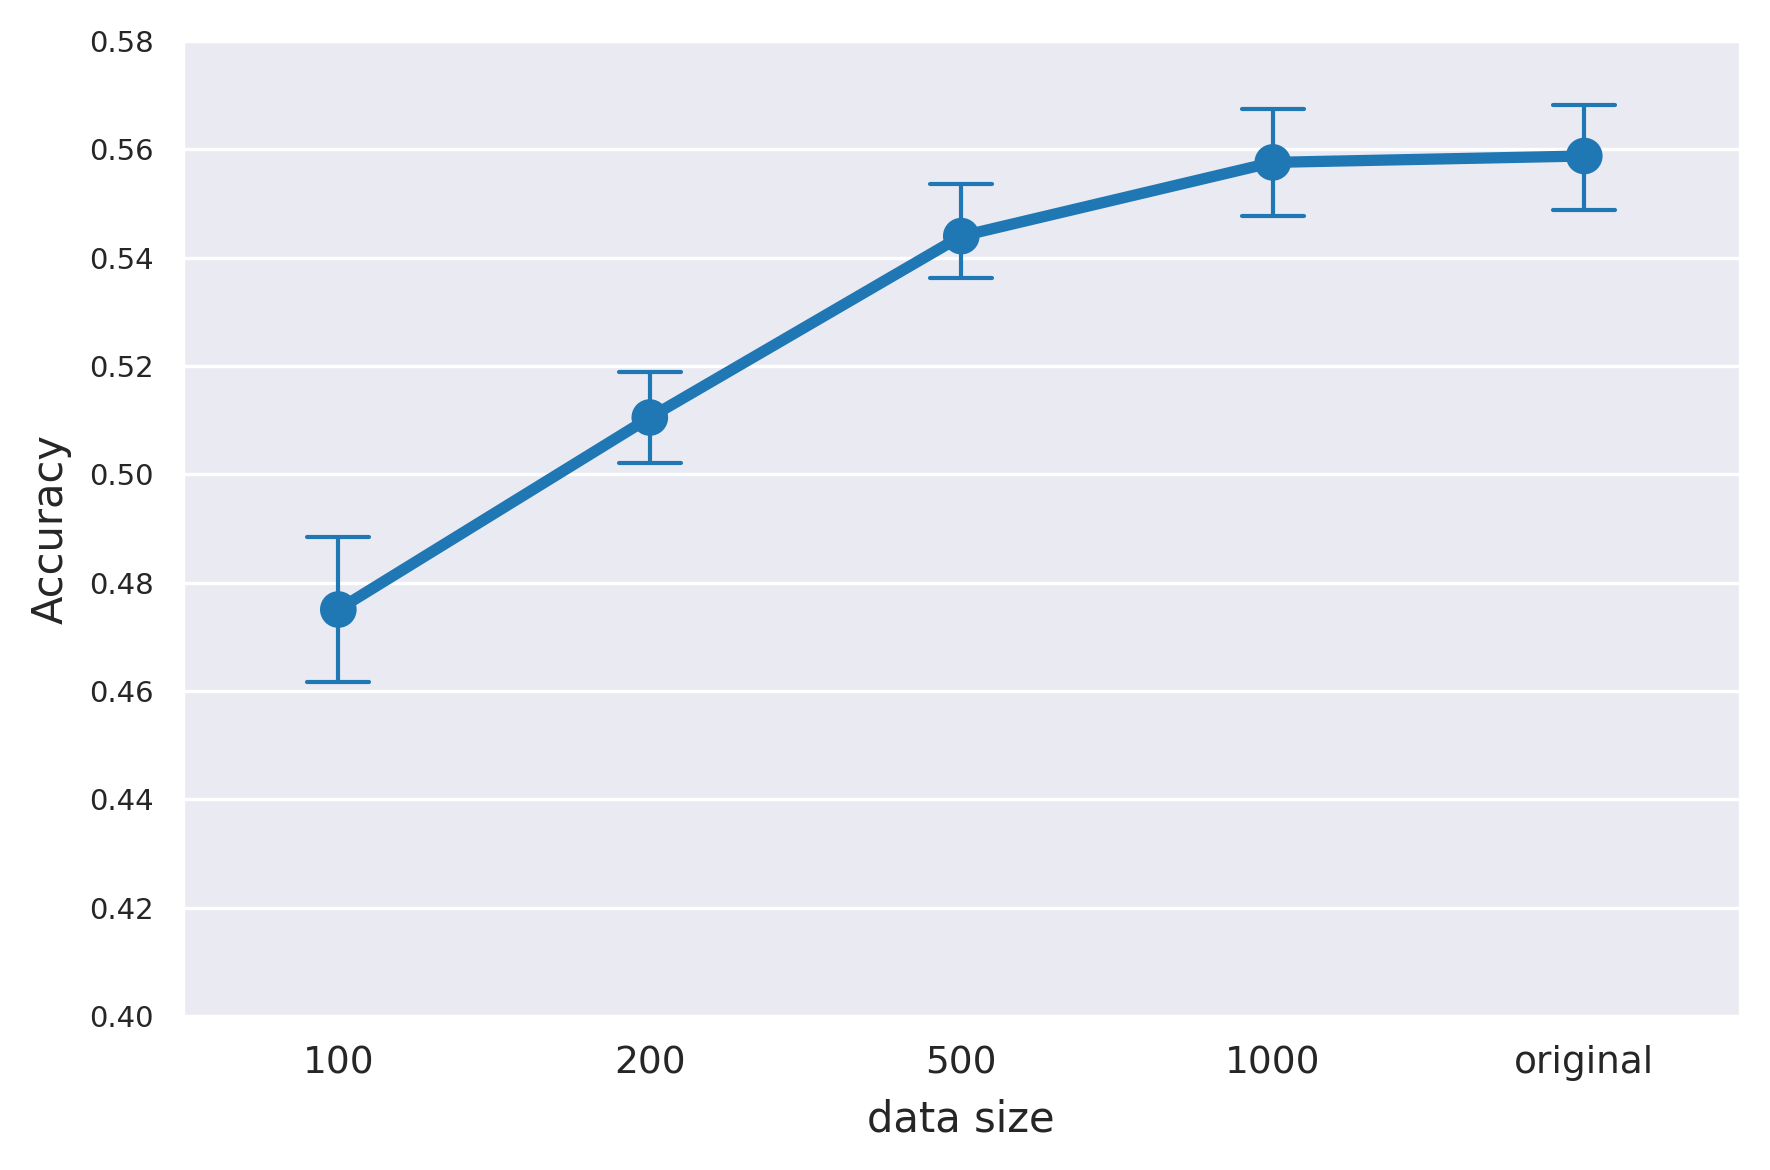

In [28]:
my_dpi=300
plt.figure(figsize=(6,4),dpi=my_dpi)
##################
# embedding size
ax = plt.subplot(1,1,1)
fig = sns.pointplot(x='few',y='per',data=few_df,ax=ax,errwidth=1,ci=68,
             capsize=0.2).set(
    xlabel='data size',ylabel='')
# plt.title('D',loc='left')
plt.yticks([.4,.42,0.44,0.46,0.48,0.50,0.52,0.54,0.56,0.58],fontsize=7)
plt.xticks(fontsize=9)
plt.ylabel('Accuracy')
plt.tight_layout()
# plt.show()
plt.savefig('Figure3_5.jpg')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MOASL v.s. SigMat: t-test independent samples, P_val=9.972e-02 stat=2.134e+00
SigMat v.s. ssCmap: t-test independent samples, P_val=2.721e-02 stat=3.403e+00
MOASL v.s. ssCmap: t-test independent samples, P_val=4.998e-03 stat=5.598e+00
ssCmap v.s. Jaccard: t-test independent samples, P_val=3.223e-01 stat=-1.128e+00
SigMat v.s. Jaccard: t-test independent samples, P_val=6.784e-02 stat=2.485e+00
MOASL v.s. Jaccard: t-test independent samples, P_val=7.801e-03 stat=4.943e+00


/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

/home/jlk/Software/anaconda3/envs/Deepmetric/lib/python3.7/site-packages/ipykernel_launcher.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.



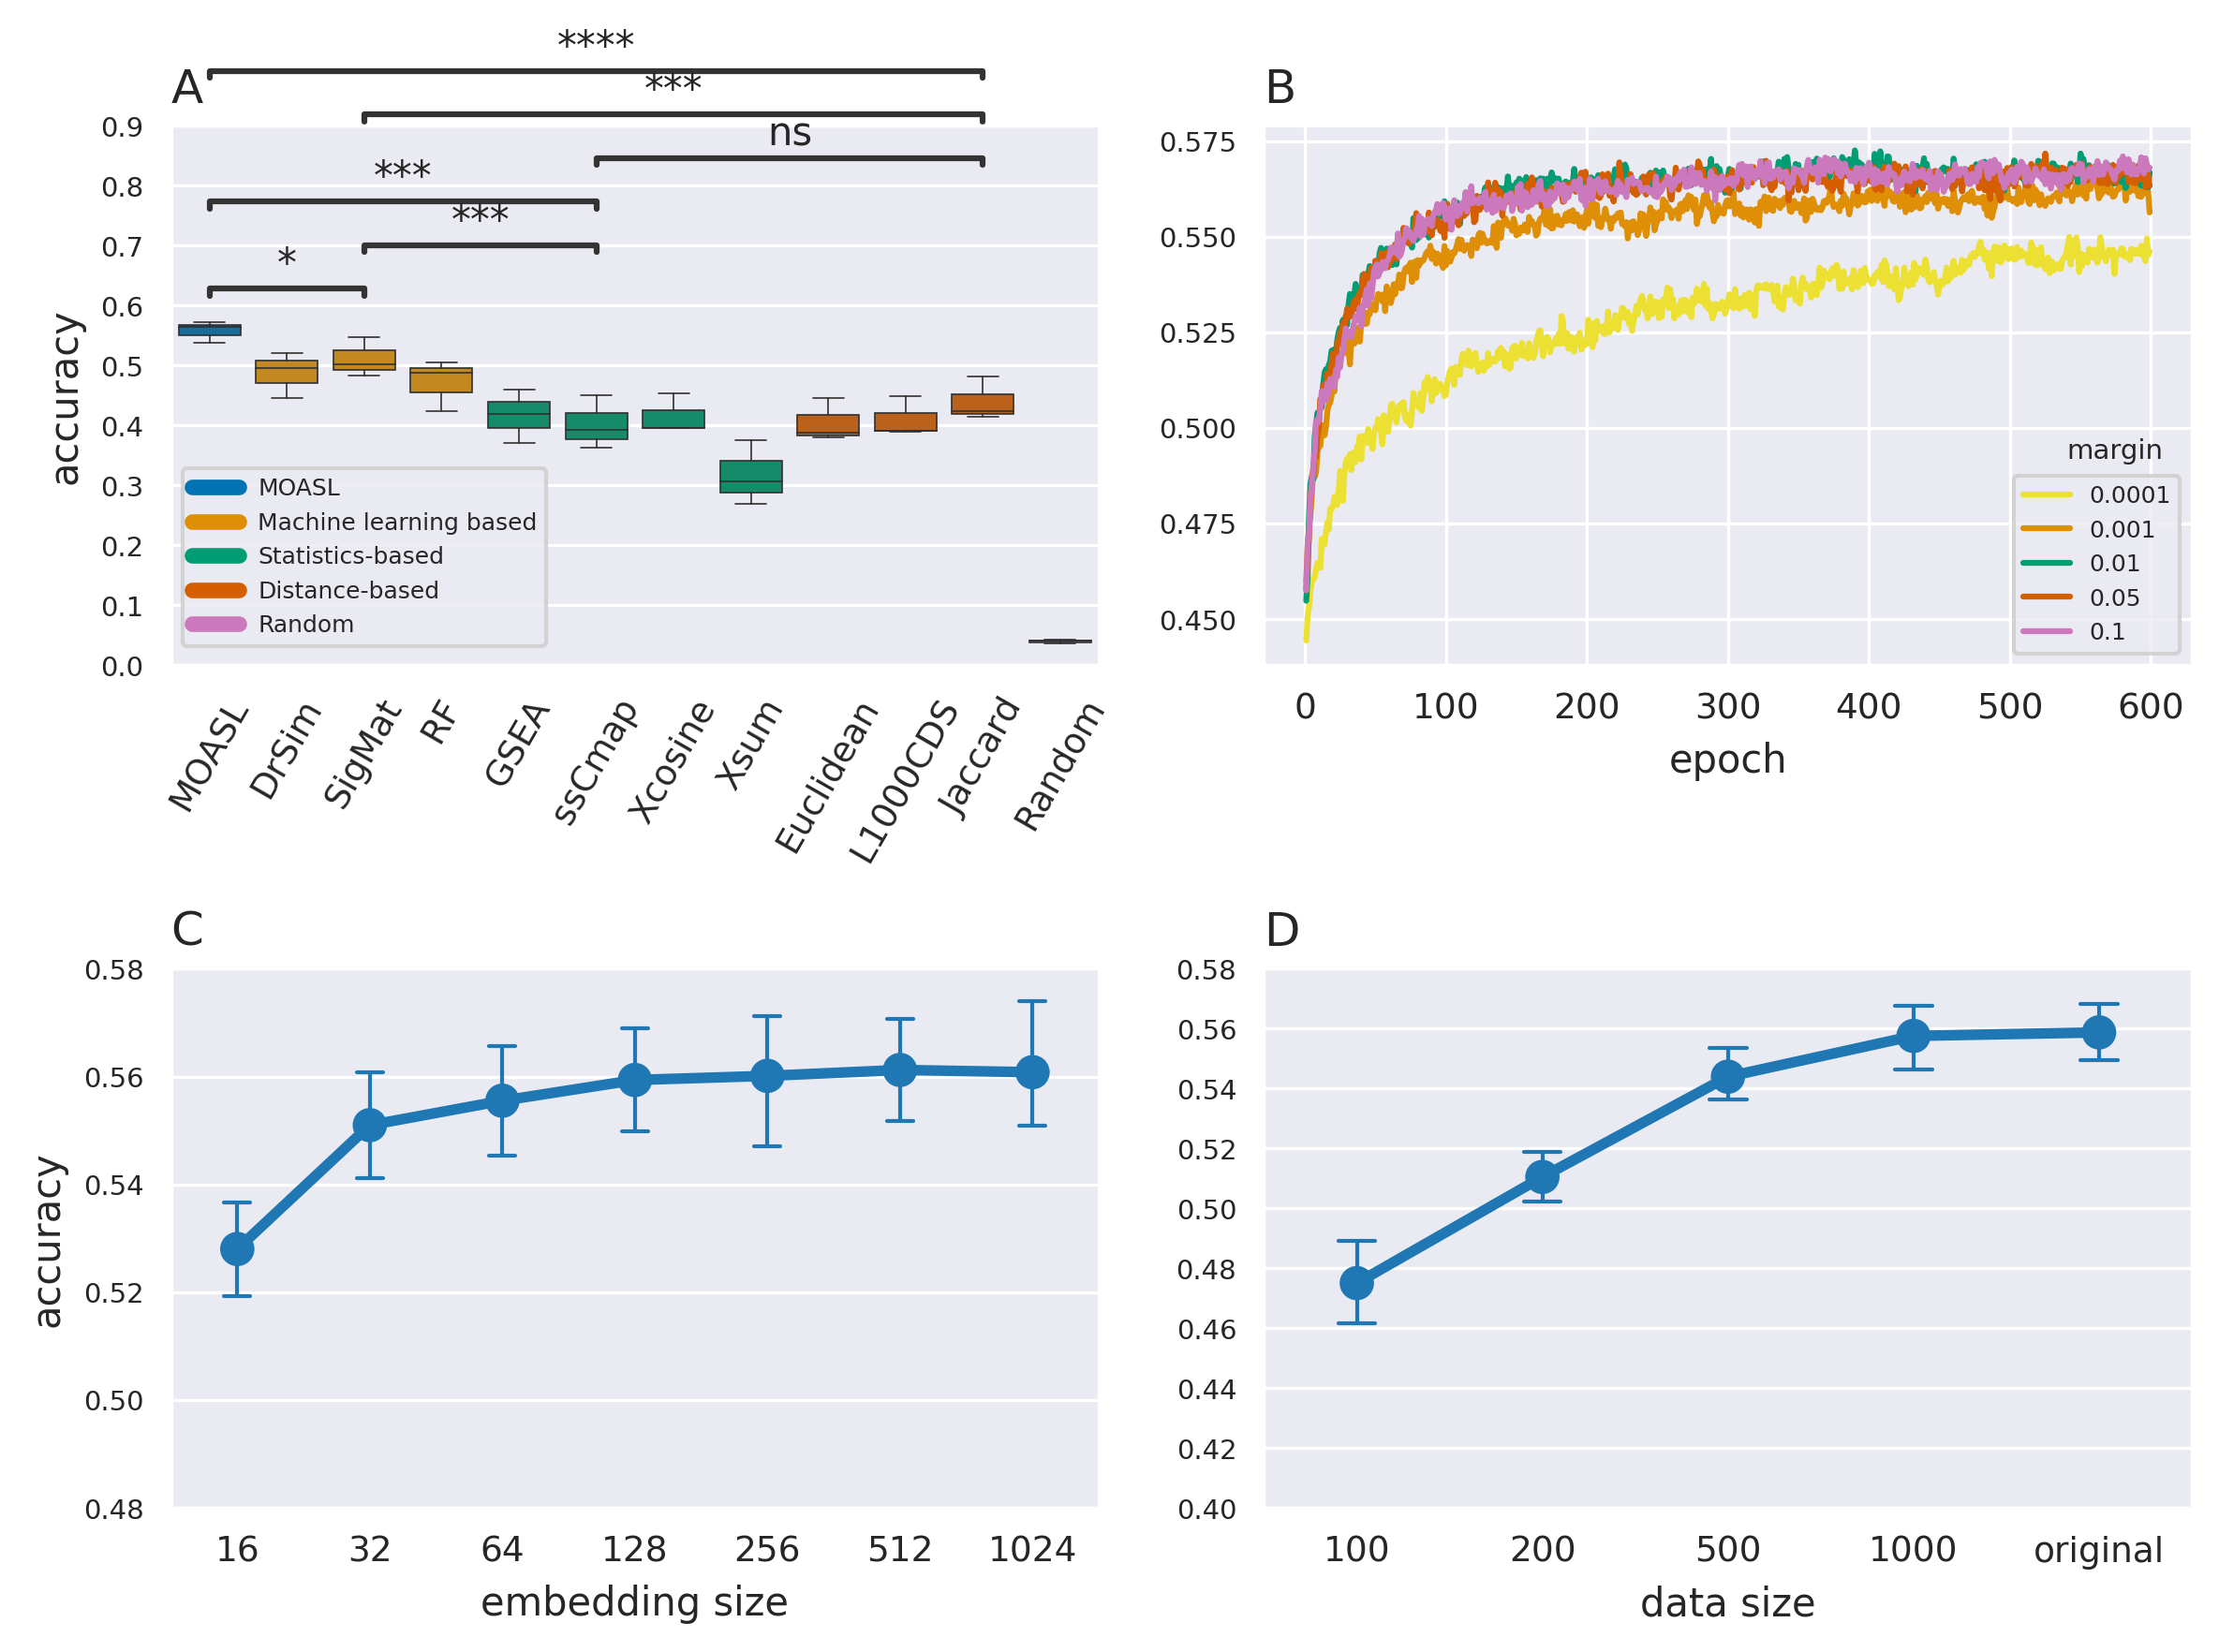

In [30]:
my_dpi=300
plt.figure(figsize=(8,6),dpi=my_dpi)
##################
# accuracy
ax1 = plt.subplot(2,2,1)

sns.boxplot(x='method',y='accuracy',data=plot_df,palette=cols,linewidth=0.4).set(xlabel=None)
test_results = add_stat_annotation(ax1, data=plot_df, x='method',y='accuracy', order=methods,
                                   box_pairs=[("MOASL", "SigMat"),
                                              ("MOASL","ssCmap"),
                                              ("MOASL","Jaccard"),
                                              ("SigMat",'ssCmap'),
                                              ('SigMat','Jaccard'),
                                              ('ssCmap','Jaccard')
                                             ],
                                   text_annot_custom=[one, two, three,four,five,six],
                                   test='t-test_ind', comparisons_correction=None, 
                                   text_format='star', loc='outside', verbose=2)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9],fontsize=7)
custom_lines = [Line2D([0], [0], color=col_pal[0], lw=4),
                Line2D([0], [0], color=col_pal[1], lw=4),
                Line2D([0], [0], color=col_pal[2], lw=4),
                Line2D([0], [0], color=col_pal[3], lw=4),
                Line2D([0], [0], color=col_pal[4], lw=4)]
ax1.legend(custom_lines, cols_kind,bbox_to_anchor=(0, 0.2), loc='center left',fontsize=6)
plt.title('A',loc='left')
plt.yticks(fontsize=7)
plt.xticks(rotation=60,fontsize=9)

##################
# accuracy
ax1 = plt.subplot(2,2,2)

pal = sns.color_palette("colorblind")
pal[0] = pal[8]
sns.lineplot(x='epoch',y='acc',data=margin_df,hue='margin',palette=pal,ax=ax1).set(
    ylabel='')
ax1.legend(loc='best',fontsize=6)
plt.title('B',loc='left')
plt.text(540, 0.492, 'margin', fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=9)

##################
# embedding size
ax2 = plt.subplot(2,2,3)
fig = sns.pointplot(x='embedding',y='per',data=embedding_df,ax=ax2,errwidth=1,ci=68,
             capsize=0.2).set(
    xlabel='embedding size',ylabel='accuracy')
plt.title('C',loc='left')
plt.yticks([0.48,0.50,0.52,0.54,0.56,0.58],fontsize=7)
# plt.yticks([0.55,0.555,0.56,0.565,0.57,0.58],fontsize=7)
plt.xticks(fontsize=9)

##################
# data size
ax3 = plt.subplot(2,2,4)
fig = sns.pointplot(x='few',y='per',data=few_df,ax=ax3,errwidth=1,ci=68,
             capsize=0.2).set(
    xlabel='data size',ylabel='')
plt.title('D',loc='left')
plt.yticks([.4,.42,0.44,0.46,0.48,0.50,0.52,0.54,0.56,0.58],fontsize=7)
plt.xticks(fontsize=9)

plt.tight_layout()
# plt.show()
plt.savefig('Figure2.jpg')